In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import os
os.chdir('drive/MyDrive')

In [ ]:
data = pd.read_csv('train (2).csv', sep = ',')

In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


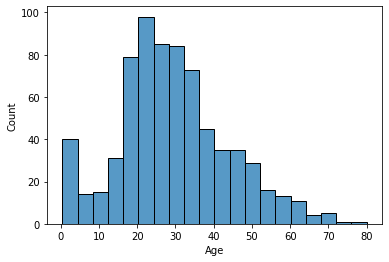

In [ ]:
sns.histplot(x = 'Age', data = data)

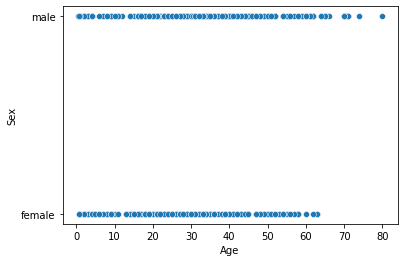

In [ ]:
sns.scatterplot(x = 'Age', y = 'Sex', data = data)

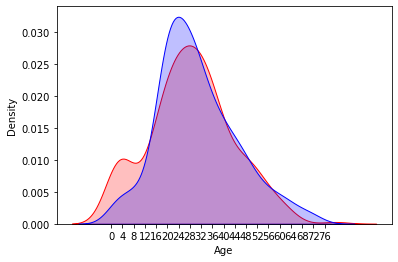

In [ ]:
ax = sns.kdeplot(x = data['Age'][data['Survived'] == 1], shade = True, palette= 'bright', color = 'red')
ax = sns.kdeplot(x = data['Age'][data['Survived'] == 0], shade = True, palette= 'dark', color = 'blue')
ax.set_xticks(np.arange(0,np.max(data['Age']), 4))

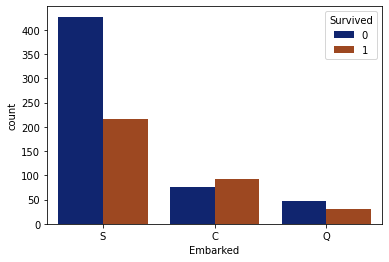

In [ ]:
sns.countplot(x = 'Embarked', data = data, hue = 'Survived', palette = 'dark', color = 'red',)

In [ ]:
fig, ax = plt.subplots()

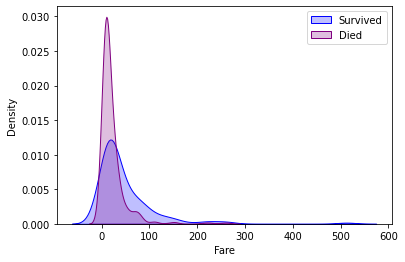

In [ ]:
ax = sns.kdeplot(x = data['Fare'][data['Survived'] == 1], shade = True, palette ='Bright', color = 'blue')
sns.kdeplot(x = data['Fare'][data['Survived'] == 0], shade = True, palette = 'Bright', color = 'purple')
ax.set_xlabel('Fare')
ax.legend(['Survived','Died'])

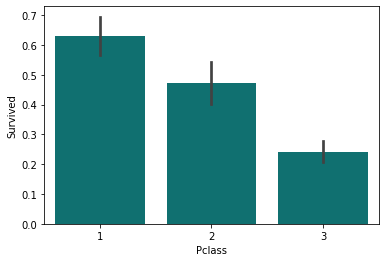

In [ ]:
sns.barplot(x = 'Pclass', y = 'Survived', data = data, color = 'teal')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

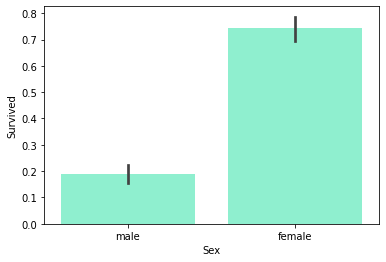

In [ ]:
sns.barplot('Sex','Survived', data = data, color = 'aquamarine')

In [ ]:
imputer = SimpleImputer(strategy = 'median')
data['Age'] = imputer.fit_transform(data['Age'].values.reshape(-1,1))
imputer = SimpleImputer(strategy = 'most_frequent')
data['Embarked'] = imputer.fit_transform(data['Embarked'].values.reshape(-1,1))

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
data['Cabin'] = imputer.fit_transform(data['Cabin'].values.reshape(-1,1))

In [ ]:
data.drop('Cabin', axis =1 ,inplace = True)

In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
data['isAlone'] = np.where((data['Parch'] + data['SibSp'])>0,0,1)

In [ ]:
data['isAlone'].value_counts()

1    537
0    354
Name: isAlone, dtype: int64

In [ ]:
data['Baby'] = data['Age'].apply(lambda x: 1 if x <= 12 else 0)

In [ ]:
data['Baby'].value_counts()

0    822
1     69
Name: Baby, dtype: int64

In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,isAlone,Baby
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0


In [ ]:
data['sex'] = np.where((data['Sex']) == 'male', 0, 1)

In [ ]:
data['name_len'] = data['Name'].apply(lambda s: 1 if s.split(',')[1].split('.')[0].replace(' ', '') in ('Mr', 'Mrs') else 0)

In [ ]:
data.tail(10)

In [ ]:
temp = pd.DataFrame(pd.get_dummies(data['Embarked'], drop_first = True))

In [ ]:
temp.shape

(891, 2)

In [ ]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
isAlone        0
Baby           0
sex            0
name_len       0
dtype: int64

In [ ]:
data.shape

(891, 15)

In [ ]:
data2 = data.copy()

In [ ]:
data2 = pd.get_dummies(data2, columns = ['Embarked'], drop_first = True)

In [ ]:
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,isAlone,Baby,sex,name_len,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0,1,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,0,0,1,0,1


In [ ]:
data = data2.copy()

In [ ]:
data['len'] = data['Name'].apply(lambda s: len(s))

In [ ]:
y = data['Survived']
data.drop(['PassengerId','Survived','Name','Sex','SibSp','Parch','Ticket'], axis = 1, inplace = True)

In [ ]:
data.head(5)

,Pclass,Age,Fare,isAlone,Baby,sex,name_len,Embarked_Q,Embarked_S,len
0,3,22.0,7.2500,0,0,0,1,0,1,23
1,1,38.0,71.2833,0,0,1,1,0,0,51
2,3,26.0,7.9250,1,0,1,0,0,1,22
3,1,35.0,53.1000,0,0,1,1,0,1,44
4,3,35.0,8.0500,1,0,0,1,0,1,24


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
data2 = data[['Pclass','Age','Fare','len']]

In [ ]:
data2 = scaler.fit_transform(data2)

In [ ]:
data[['Pclass','Age','Fare','len']] = data2

In [ ]:
data.head()

,Pclass,Age,Fare,isAlone,Baby,sex,name_len,Embarked_Q,Embarked_S,len
0,0.827377,-0.565736,-0.502445,0,0,0,1,0,1,-0.427451
1,-1.566107,0.663861,0.786845,0,0,1,1,0,0,2.590962
2,0.827377,-0.258337,-0.488854,1,0,1,0,0,1,-0.535252
3,-1.566107,0.433312,0.420730,0,0,1,1,0,1,1.836359
4,0.827377,0.433312,-0.486337,1,0,0,1,0,1,-0.319651


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {"C":[0.01,0.1,10]}

In [ ]:
grid = GridSearchCV(LogisticRegression(random_state = 41), params , cv = 10, verbose = 4, error_score='accuracy')

In [ ]:
grid.fit(data,y)

In [ ]:
grid.best_params_

{'C': 0.1}

In [ ]:
grid.best_score_

0.8025343320848938

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.3)
model = LogisticRegression(C = 0.1, random_state = 41)
model.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=41, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
precision_score(y_train, model.predict(X_train))

0.7766990291262136

In [ ]:
recall_score(y_train, model.predict(X_train))

0.6837606837606838

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
prec, rec, th = precision_recall_curve(y_train, model.predict_proba(X_train)[:,1],)

In [ ]:
np.where(prec > 0.85)

(array([433, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446,
        447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459,
        460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472,
        473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485,
        486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498,
        499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511,
        512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524,
        525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537,
        538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550,
        551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563,
        564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576,
        577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 589, 590,
        591, 592, 593, 594]),)

In [ ]:
precision_score(y_test, model.predict_proba(X_test)[:,1] > th[433])

0.8412698412698413

In [ ]:
recall_score(y_test, model.predict_proba(X_test)[:,1] > th[433])

0.49074074074074076

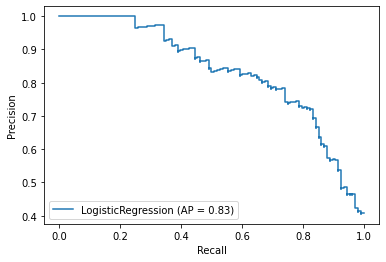

In [ ]:
plot_precision_recall_curve(model,X_test, y_test)